Student's Name and Email Address

Boise State University, Department of Chemistry and Biochemistry

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression





## Task 1: Emission Spectra of Standard and Unknown {-}

* Visualize the chemical structures of quinine sulfate (CAS 6119-70-6) and fluorescein (CAS 2321-07-5) and comment on why these molecules are fluorophores/dyes.
* Plot the emission and absorption spectra for the standard (quinine) in a single figure. Do a separate plot for then emission and absorption spectra of the unknown (fluorescein). NOTE: the two spectra will probably have different arbitrary units. In order to compare their featuers you may want to normalize the two spectra, e.g. dividing by the intensity of the highest peaks. 
* Report the integrated areas for the spectra of each molecule, and for each concentration of fluoresceine.
* Explicitly report all the other constants and/or known experimental values that you will need to compute the quantum yield at infinite dilution of fluorescein. 

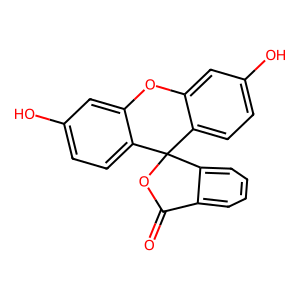

In [20]:

#@title The Composition of Fluorescein is as follows:
#!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
#!pip install cirpy
import cirpy
quinine=cirpy.resolve('6119-70-6', 'smiles')
fluorescein=cirpy.resolve('2321-07-5', 'smiles')
Draw.MolToImage(Chem.MolFromSmiles(fluorescein))

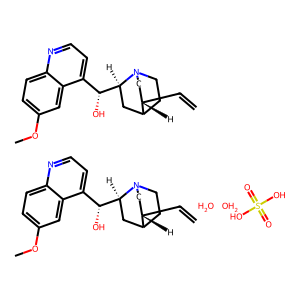

In [21]:
Draw.MolToImage(Chem.MolFromSmiles(quinine))



Quinine sulfate fluoresces due to its bicyclic aromatic system. Fluorescein fluoresces due to its extensive conjugation (xanthene) and electron-donating groups.




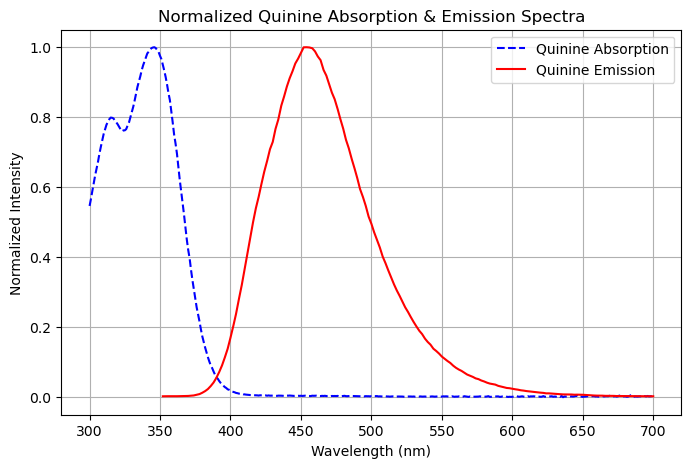

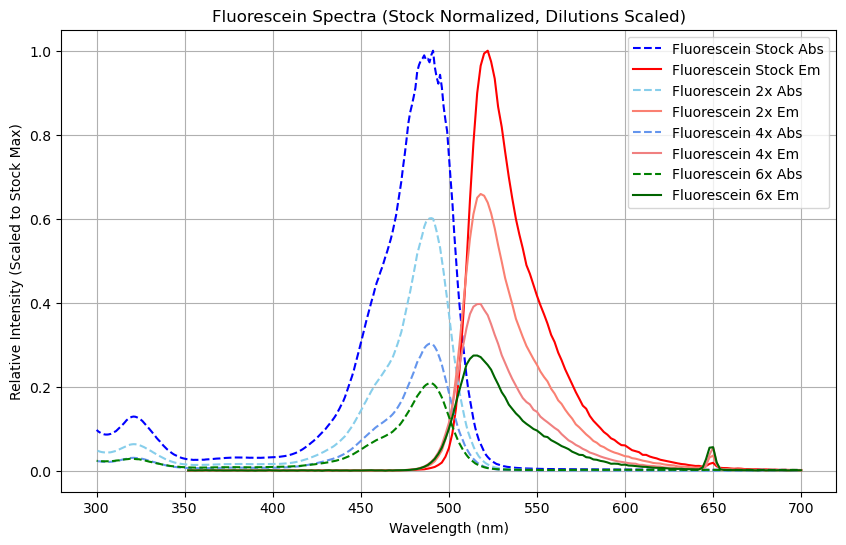

In [28]:

def load_csv(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=1)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None

    if df.shape[1] < 2:
        print(f"Error: File {file_path} does not contain at least two columns.")
        return None

    df = df.iloc[:, :2].dropna()
    df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors="coerce")
    df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors="coerce")
    df.columns = ["Wavelength", "Intensity"]
    return df

# Function to load dilution data and scale relative to stock max intensity
def load_and_scale_dilution(file_path, stock_max):
    df = load_csv(file_path)
    if df is not None and stock_max > 0:
        df["Intensity"] /= stock_max  # Scale to stock max intensity
    return df

# Load stock data (normalized)
quinine_exc = load_csv("QuantumYield_Data/UV-Vis/Quinine_Stock_UV_Format.csv")
quinine_em = load_csv("QuantumYield_Data/Fluorescence/Quinine_Stock_Fluorescence.csv")
fluorescein_exc_stock = load_csv("QuantumYield_Data/UV-Vis/Fluorescein_UV_Stock.csv")
fluorescein_em_stock = load_csv("QuantumYield_Data/Fluorescence/Fluorescence_Fluorescein_Dilutions/Actual Stock Fluorescein.csv")

# Get max intensity values for stock solutions
stock_max_exc = fluorescein_exc_stock["Intensity"].max() if fluorescein_exc_stock is not None else 1
stock_max_em = fluorescein_em_stock["Intensity"].max() if fluorescein_em_stock is not None else 1

# Load dilution data and scale them relative to the stock intensity
fluorescein_exc_2x = load_and_scale_dilution("QuantumYield_Data/UV-Vis/Fluorescein_UV_2x.csv", stock_max_exc)
fluorescein_em_2x = load_and_scale_dilution("QuantumYield_Data/Fluorescence/Fluorescence_Fluorescein_Dilutions/Fluorescein_2fold.csv", stock_max_em)
fluorescein_exc_4x = load_and_scale_dilution("QuantumYield_Data/UV-Vis/Fluorescein_UV_4x.csv", stock_max_exc)
fluorescein_em_4x = load_and_scale_dilution("QuantumYield_Data/Fluorescence/Fluorescence_Fluorescein_Dilutions/Fluorescein_4fold.csv", stock_max_em)
fluorescein_exc_6x = load_and_scale_dilution("QuantumYield_Data/UV-Vis/Fluorescein_UV_6x.csv", stock_max_exc)
fluorescein_em_6x = load_and_scale_dilution("/Users/School/PycharmProjects/PChemLab/QuantumYield_Data/Fluorescence/Fluorescence_Fluorescein_Dilutions/Fluorescein_6fold.csv", stock_max_em)

# **🎨 Plot Quinine Spectra**
plt.figure(figsize=(8, 5))
if quinine_exc is not None and quinine_em is not None:
    plt.plot(quinine_exc["Wavelength"], quinine_exc["Intensity"] / quinine_exc["Intensity"].max(), label="Quinine Absorption", linestyle="--", color="blue")
    plt.plot(quinine_em["Wavelength"], quinine_em["Intensity"] / quinine_em["Intensity"].max(), label="Quinine Emission", linestyle="-", color="red")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Normalized Intensity")
    plt.title("Normalized Quinine Absorption & Emission Spectra")
    plt.legend()
    plt.grid(True)
    plt.show()

# **🎨 Plot Fluorescein Spectra**
plt.figure(figsize=(10, 6))

# Stock Abs & Em
plt.plot(fluorescein_exc_stock["Wavelength"], fluorescein_exc_stock["Intensity"] / stock_max_exc, label="Fluorescein Stock Abs", linestyle="--", color="blue")
plt.plot(fluorescein_em_stock["Wavelength"], fluorescein_em_stock["Intensity"] / stock_max_em, label="Fluorescein Stock Em", linestyle="-", color="red")

# 2x Dilution
plt.plot(fluorescein_exc_2x["Wavelength"], fluorescein_exc_2x["Intensity"], label="Fluorescein 2x Abs", linestyle="--", color="skyblue")
plt.plot(fluorescein_em_2x["Wavelength"], fluorescein_em_2x["Intensity"], label="Fluorescein 2x Em", linestyle="-", color="salmon")

# 4x Dilution
plt.plot(fluorescein_exc_4x["Wavelength"], fluorescein_exc_4x["Intensity"], label="Fluorescein 4x Abs", linestyle="--", color="cornflowerblue")
plt.plot(fluorescein_em_4x["Wavelength"], fluorescein_em_4x["Intensity"], label="Fluorescein 4x Em", linestyle="-", color="lightcoral")

# 6x Dilution
plt.plot(fluorescein_exc_6x["Wavelength"], fluorescein_exc_6x["Intensity"], label="Fluorescein 6x Abs", linestyle="--", color="green")
plt.plot(fluorescein_em_6x["Wavelength"], fluorescein_em_6x["Intensity"], label="Fluorescein 6x Em", linestyle="-", color="darkgreen")

plt.xlabel("Wavelength (nm)")
plt.ylabel("Relative Intensity (Scaled to Stock Max)")
plt.title("Fluorescein Spectra (Stock Normalized, Dilutions Scaled)")
plt.legend()
plt.grid(True)
plt.show()



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to load spectral data (wavelength in column 1, intensity in column 2)
def load_csv(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=1)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None

    if df.shape[1] < 2:
        print(f"Error: File {file_path} does not contain at least two columns.")
        return None

    df = df.iloc[:, :2].dropna()
    df.iloc[:, 0] = pd.to_numeric(df.iloc[:, 0], errors='coerce')
    df.iloc[:, 1] = pd.to_numeric(df.iloc[:, 1], errors='coerce')
    df.columns = ["Wavelength", "Intensity"]
    return df

# Load unnormalized data
base_dir = "QuantumYield_Data"
quinine_exc = load_csv(os.path.join(base_dir, "UV-Vis", "Quinine_Stock_UV_Format.csv"))
quinine_em = load_csv(os.path.join(base_dir, "Fluorescence", "Quinine_Stock_Fluorescence.csv"))
fluorescein_exc = load_csv(os.path.join(base_dir, "UV-Vis", "Fluorescein_UV_Stock.csv"))
fluorescein_em = load_csv(os.path.join(base_dir, "Fluorescence", "Fluorescence_Fluorescein_Dilutions", "Actual Stock Fluorescein.csv"))

# Calculate integrated areas
if quinine_exc is not None and quinine_em is not None and fluorescein_exc is not None and fluorescein_em is not None:
    area_quinine_exc = np.trapz(quinine_exc["Intensity"], quinine_exc["Wavelength"])
    area_quinine_em = np.trapz(quinine_em["Intensity"], quinine_em["Wavelength"])
    area_fluorescein_exc = np.trapz(fluorescein_exc["Intensity"], fluorescein_exc["Wavelength"])
    area_fluorescein_em = np.trapz(fluorescein_em["Intensity"], fluorescein_em["Wavelength"])

    # Report integrated areas
    print("Integrated Areas:")
    print(f"Quinine Absorption: {area_quinine_exc:.2f}")
    print(f"Quinine Emission: {area_quinine_em:.2f}")
    print(f"Fluorescein Absorption: {area_fluorescein_exc:.2f}")
    print(f"Fluorescein Emission: {area_fluorescein_em:.2f}")
else:
    print("Error: Could not load all data files.")

Integrated Areas:
Quinine Absorption: -22.69
Quinine Emission: 88998.90
Fluorescein Absorption: -157.80
Fluorescein Emission: nan


## Task 2: Quantum Yield of the Standard {-}

The Stern-Volmer equation for self-quenching of solutions allows you to compute the quantum yield of fluorescence from the molar concentration of the dye, $C$, as  

$\frac{\phi^0_s}{\phi_s}=1+14.5\cdot C$

where $\phi^0_s$ is the quantum yield at infinite dilution for the quinine standard ($s$), and the slope of the curve ($14.5\ M^{-1}$) is specific to quinine.

* Use absorbance data at $349.5\ nm$, molar absorption coefficient of quinine (provided in the handsout), cuvette path length of $1\ cm$, and Beers law to find the concentration of quinine in your sample.
* Given that for quinine you know $\phi^0_s=0.545$, use the Stern-Volmer equation to compute the quantum yield of quinine, $\phi_s$, at the concentration used in the experiments. 

## Task 3: Quantum yield of the Unknown {-}

Although the absolute incident intensity of the radiation is unkonwn, the relative incident intensity between an unknown sample and a standard sample will be the same. The quantum yield of the analyte, fluorescein, can thus be determined by comparing the intesity of fluorescence with the one of quinine. 

$\frac{\phi_u}{\phi_s}=\frac{I_u\cdot(1-10^{-A_s})}{I_s\cdot(1-10^{-A_u})}$

where $I_{u/s}$ is the area under the emission spectrum of the unknown/standard (i.e. fluorescein/quinine), while $A_{s/u}$ is the absorbance if the standard/unknown measured at the excitation wavelength. 

* Use the formula above and the results from the previous tasks (see below) to compute the fluorescence quantum yield of fluorescein at the concentrations used in the experiments.

You will need:
* The absorption of quinine $A_s$ at $323\ nm$
* The quantum yeld of quinine from the previous task
* The integrated fluorescence intensity $I_s$ for quinine
* Absorption of fluoresceine $A_u$ at $323\ nm$ for each sample
* Integrated fluorescence intensity $I_u$ for fluoresceine for each sample

## Task 4: Stern-Volmer Curve for Fluorescein {-}

* Use absorbance data at $485\ nm$, molar absorption coefficient of fluorescein (provided in the handsout), cuvette path length of $1\ cm$, and Beers law to find the concentration of fluoresceins' samples. You may not be able to use Beers law for the high concentration samples, but you can use the dilution factors to determine these concentrations from the low-concentration samples. 
* Plot the inverse of the fluorescence quantum yield of fluorescein (previous task) as a function of concentration. 
* Perform a linear fit of the inverse of the fluorescence quantum yield of fluorescein vs. concentration:
    * From the y-intercept of your linear fit you should obtain the inverse of the fluorescence quantum yield at infinite dilution for fluorescein, $\phi^0_u$.
    * From the slope of your linear fit you should be able to obtain the quenching constant for fluorescein, i.e., the slope of the S-V curve. 


## Discussion {-}

In the final submission, make sure to address the following points:
* Comment on the coupling between the excited state and ground state for both fluorescein and quinine. What measurement allows you to compare the coupling?
* Looking at the molecular structures, can you propose a reasonable explanation for the difference in the infinite dilution fluorescence quantum yields for quinine and fluorescein? Which one couples more strongly to the solvent?
* Which molecule shows a stronger ability to self-quench?  What part of the Stern-Volmer plots provide this information? Can you provide an explanation for the difference between the two molecules?

In [24]:
# This cell is used to allow Google Colab to install the tools to convert the notebook to a pdf file
# Un-comment the following lines when you are ready to export the pdf 
#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc

In [25]:
# Use this command to convert the finished worksheet into a pdf 
# NOTE : you may want to change the path of the file, if you are working in a different folder of the Google Drive
#!jupyter nbconvert --no-input --to PDF "/content/drive/MyDrive/Colab Notebooks/QuantumYield_Worksheet.ipynb"